In [1]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./data/*/*.csv')):
    _dfs_list.append(pd.read_csv(csv_filename, header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|███████████████████████████████████████████████████████████████████████████████| 330/330 [00:01<00:00, 227.55it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,34,69,25137,10967,2604,5321,25031,37279,1725,2549,NaN,NaN,NaN
1,43,74,15167,34062,17446,16113,49284,52473,31642,7755,NaN,NaN,NaN
2,61,64,5726,4932,2482,6996,139747,18902,7644,3362,NaN,NaN,NaN


In [3]:
df = df.iloc[:,:10]
df = df.iloc[:,2:]
#print(df)
df.columns = ['LowAlpha','HighAlpha','LowBeta','HighBeta','Delta','Theta','LowGamma','MiddleGamma']
df


,LowAlpha,HighAlpha,LowBeta,HighBeta,Delta,Theta,LowGamma,MiddleGamma
0,25137,10967,2604,5321,25031,37279,1725,2549
1,15167,34062,17446,16113,49284,52473,31642,7755
2,5726,4932,2482,6996,139747,18902,7644,3362
3,24948,14535,30571,15185,228001,124834,13174,7611
4,5626,6658,6843,4939,260240,23033,3564,3302
...,...,...,...,...,...,...,...,...
55,2011,885,4578,2170,82906,12088,1596,3445
56,8654,823,5560,2820,201373,68481,782,1166
57,2470,1004,1046,763,64186,27932,337,494
58,5916,10716,8534,9071,184187,91203,4539,9489


In [4]:
import pandas as pd
import numpy as np
import mne

# Convert all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')

# Remove any rows with NaN values
df = df.dropna()
#data = df.values.T

# Create an MNE Raw object
ch_names = ['LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'Delta', 'Theta', 'LowGamma', 'MiddleGamma']
ch_types = ['eeg']*8
sfreq = 256  # sampling frequency
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

raw = mne.io.RawArray(df.values.T, info)

Creating RawArray with float64 data, n_channels=8, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


In [5]:
import mne
import numpy as np


# Preprocess the data
raw.filter(1, 50)  # filter out unwanted frequency bands
raw.notch_filter(60)  # remove powerline noise

# Create events array
event_id = {'condition1': 1, 'condition2': 2}  # specify the event types and IDs
events = mne.make_fixed_length_events(raw, id=1, start=0, stop=None, duration=1.0)

epochs = mne.Epochs(raw, events, tmin=0, tmax=1, baseline=None, detrend=1, reject=None, preload=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


0 bad epochs dropped


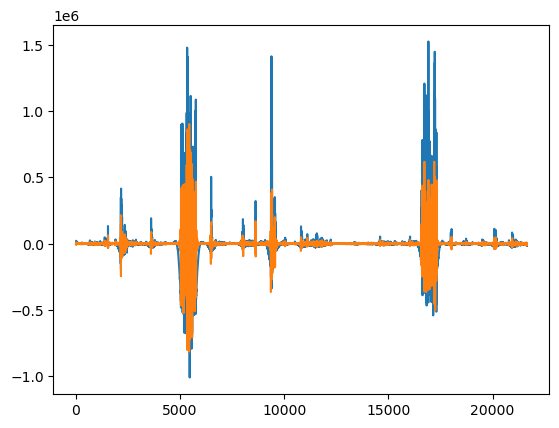

In [6]:
plt.plot(raw.copy().get_data()[7])
plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[7])

In [7]:
#raw.set_channel_types({'LowAlpha': 'misc','HighAlpha': 'misc', 'LowBeta': 'misc', 'HighBeta':'misc', 'Delta': 'misc', 'Theta': 'misc', 'LowGamma': 'misc', 'MiddleGamma': 'misc'})
#standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
#raw.drop_channels(['X', 'Y', 'nd'])
#raw.set_montage(standard_1020_montage)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Fitting ICA took 0.2s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.
Using matplotlib as 2D backend.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_14992\2677270031.py:46: RuntimeWarning: Using n_components=5 (resulting in n_components_=5) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (5.8e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 3
  ica.fit(raw_band)


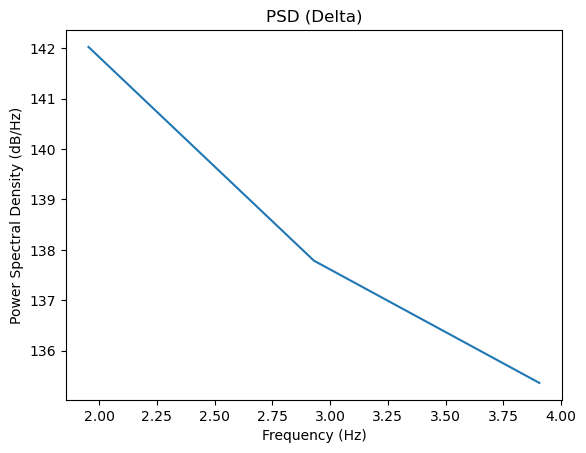

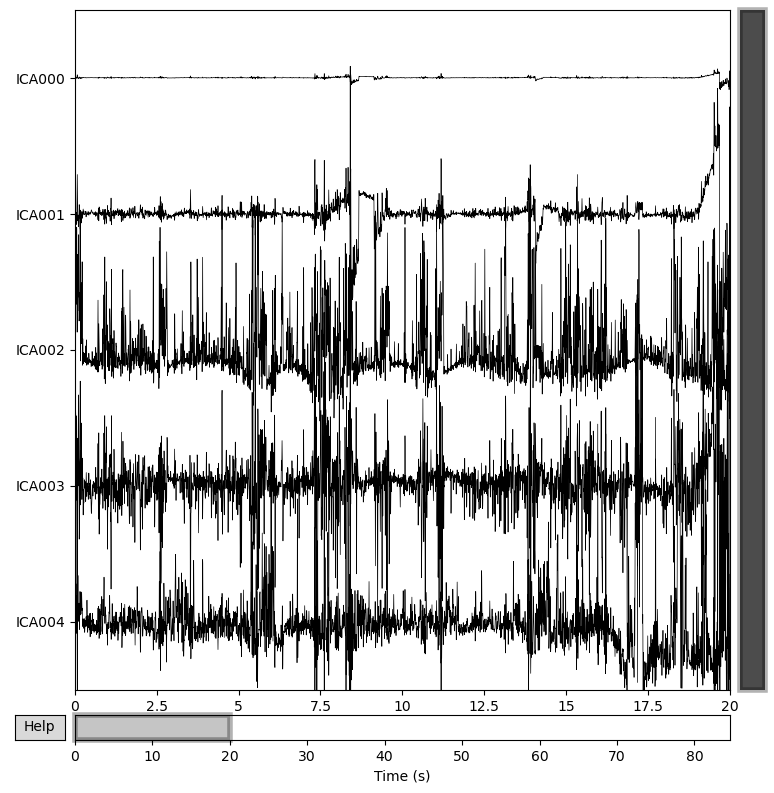

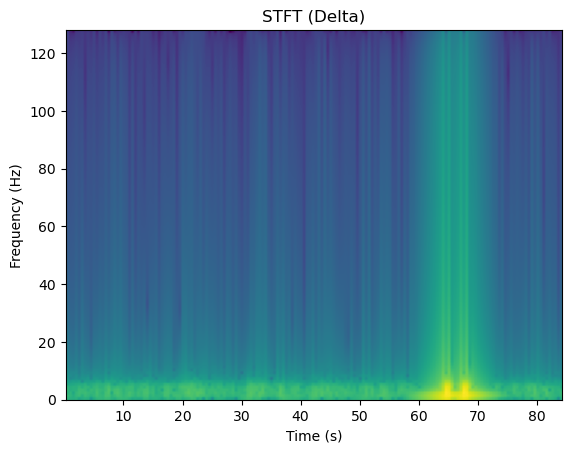

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\AppData\Local\Temp\ipykernel_14992\2677270031.py:46: RuntimeWarning: Using n_components=5 (resulting in n_components_=5) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (1.7e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 4
  ica.fit(raw_band)


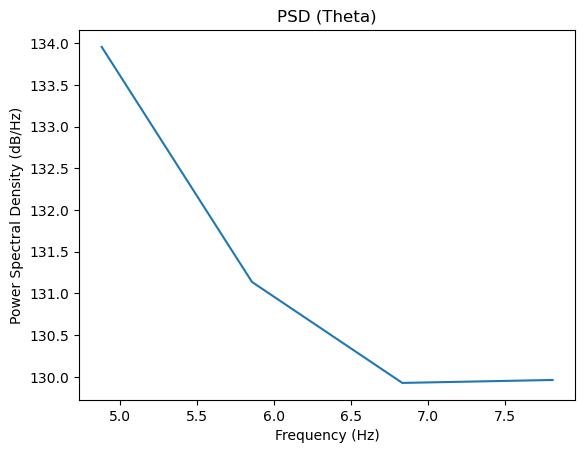

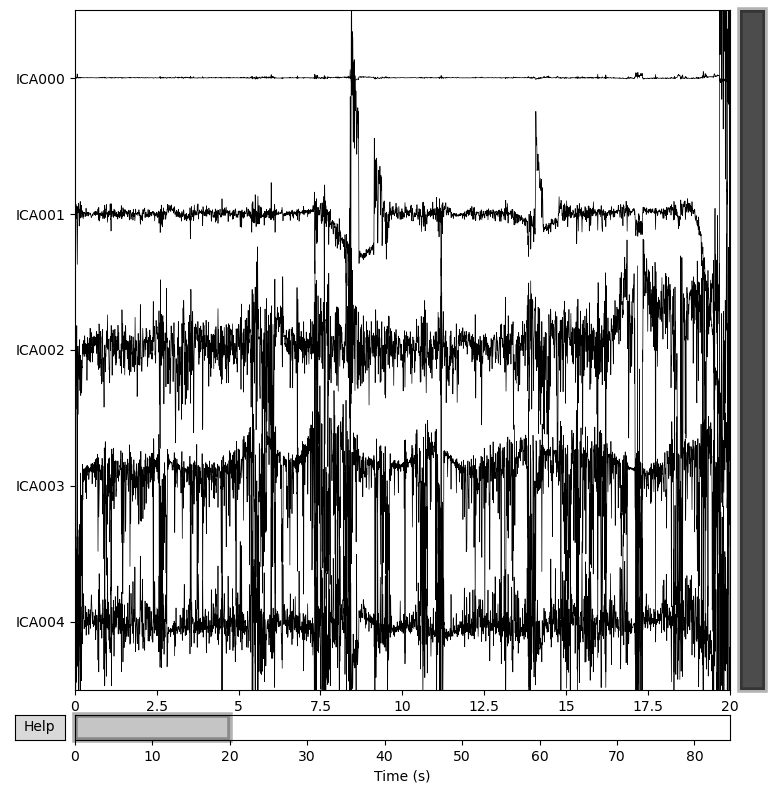

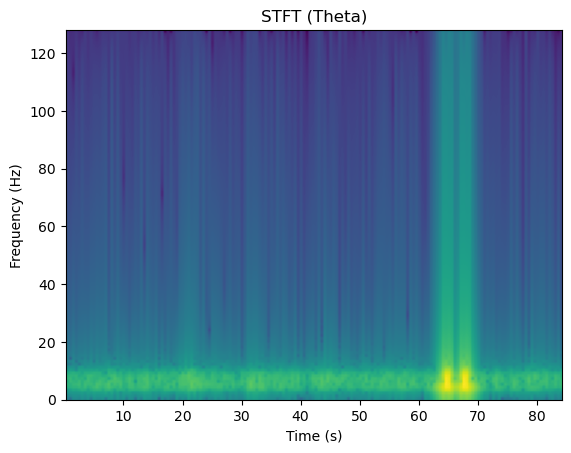

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 10 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 10.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\AppData\Local\Temp\ipykernel_14992\2677270031.py:46: RuntimeWarning: Using n_components=5 (resulting in n_components_=5) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (2.6e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 4
  ica.fit(raw_band)


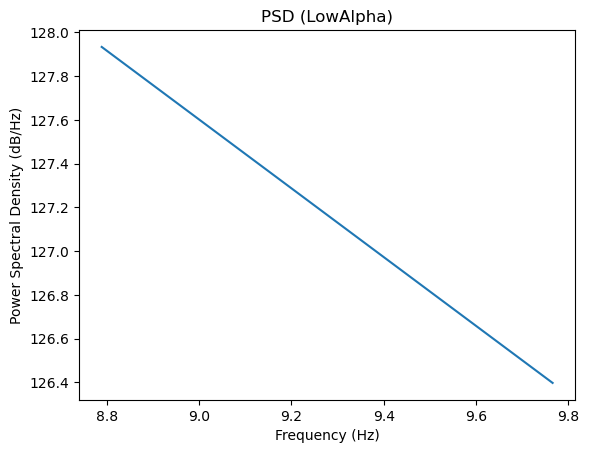

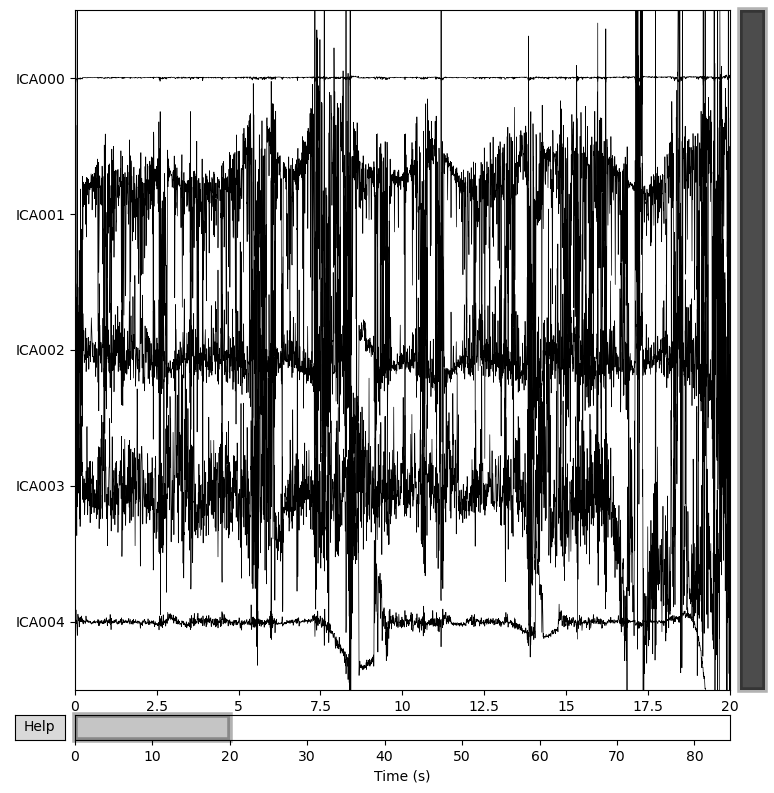

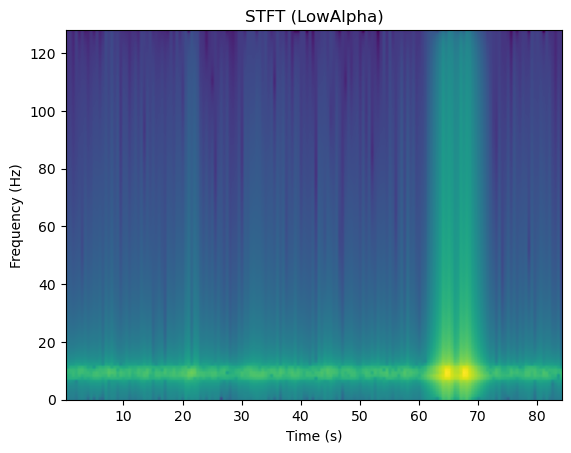

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 10.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\AppData\Local\Temp\ipykernel_14992\2677270031.py:46: RuntimeWarning: Using n_components=5 (resulting in n_components_=5) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (4.2e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 4
  ica.fit(raw_band)


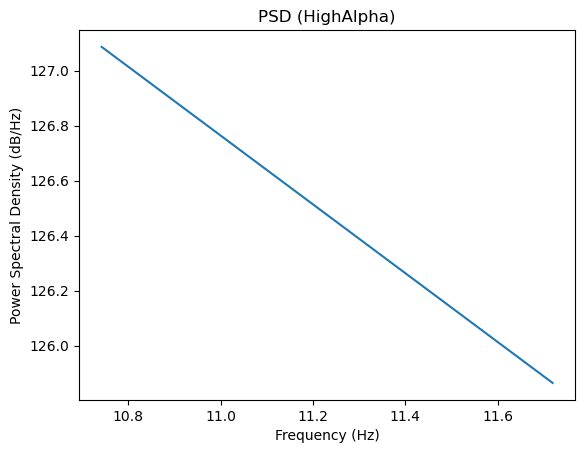

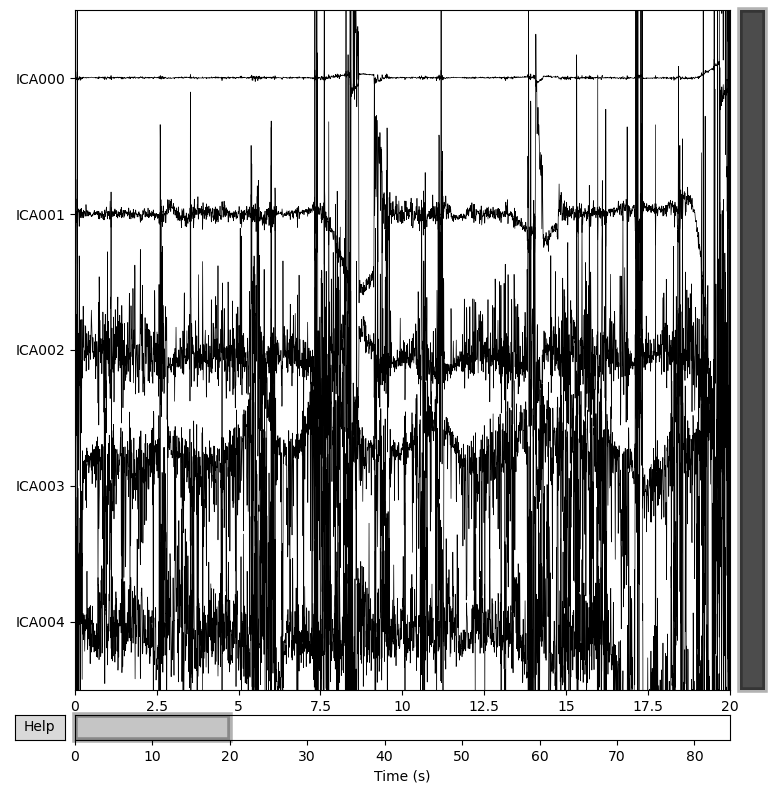

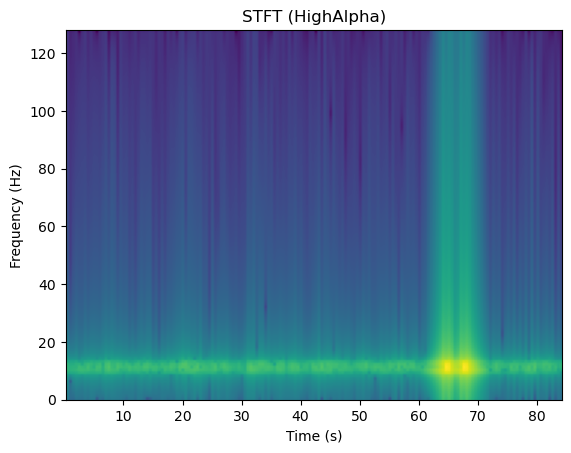

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 16 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 16.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\AppData\Local\Temp\ipykernel_14992\2677270031.py:46: RuntimeWarning: Using n_components=5 (resulting in n_components_=5) may lead to an unstable mixing matrix estimation because the ratio between the largest (8) and smallest (6.8e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 4
  ica.fit(raw_band)


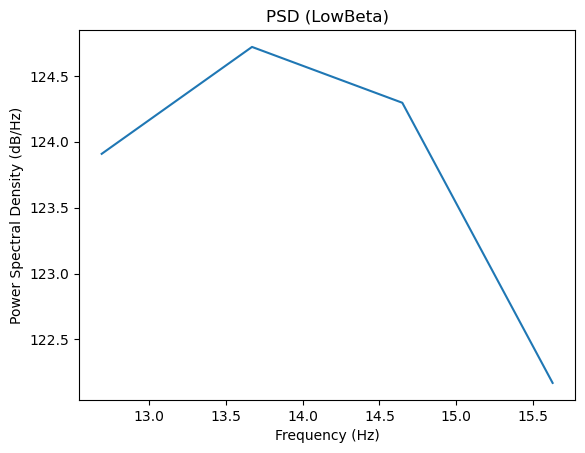

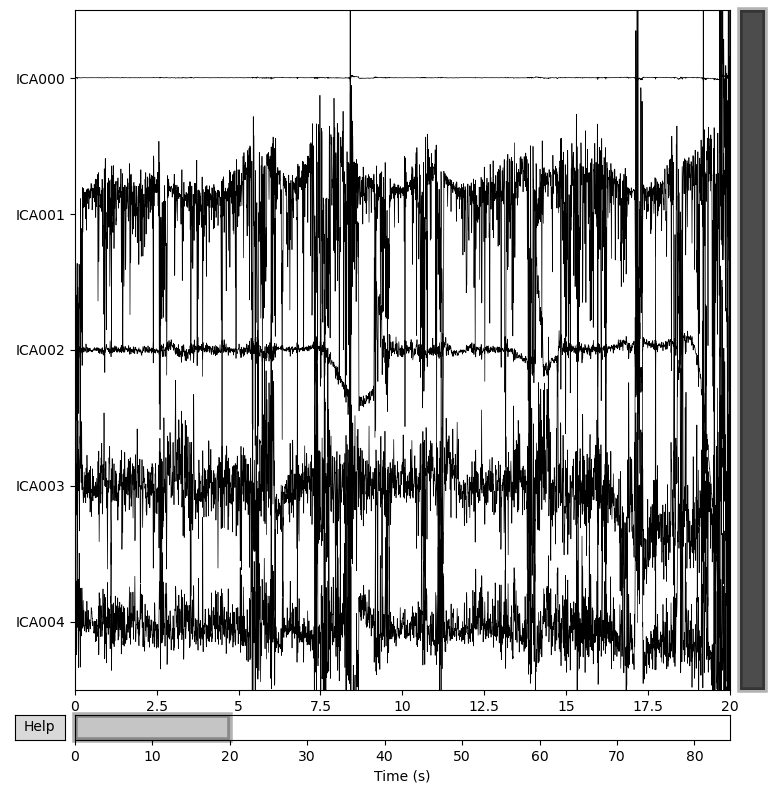

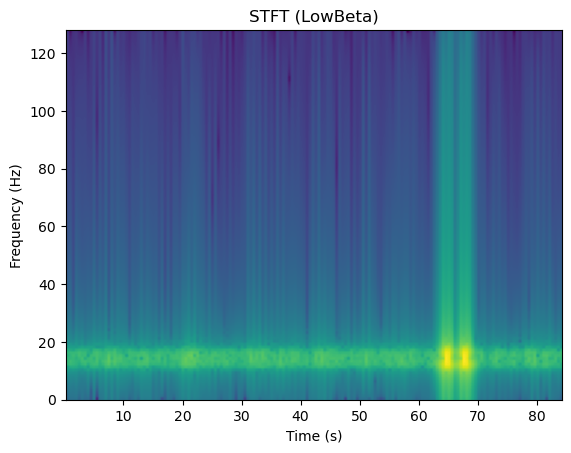

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 16 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 16.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


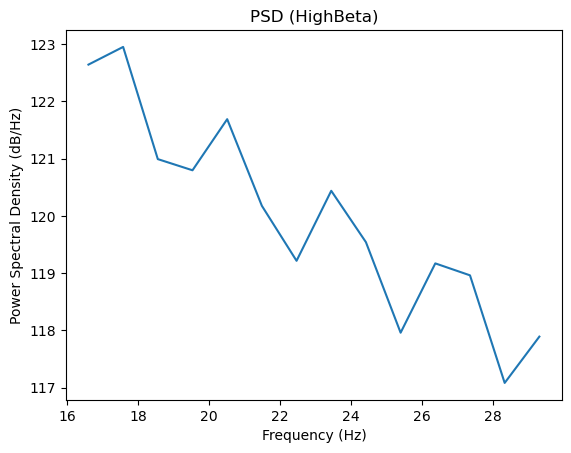

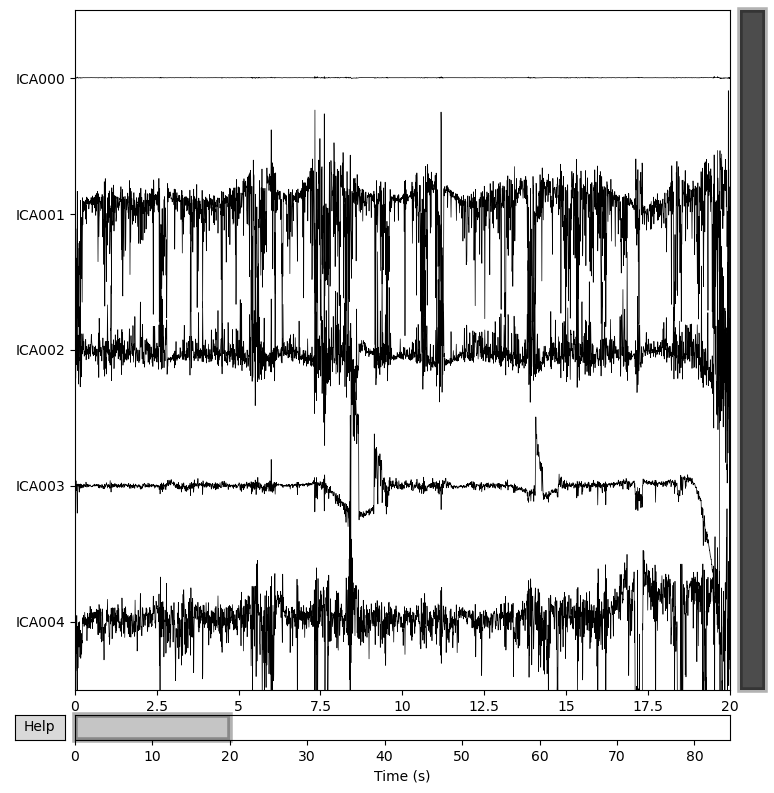

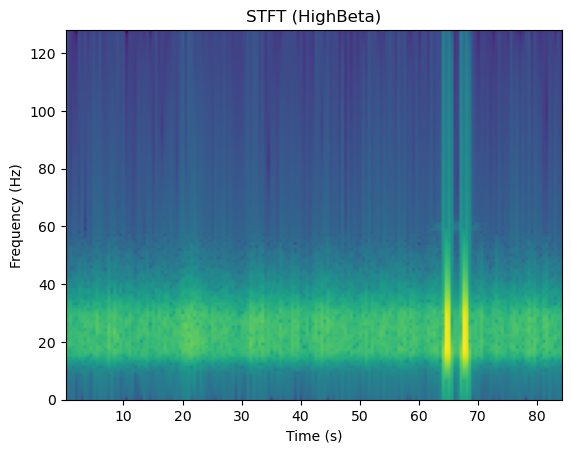

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


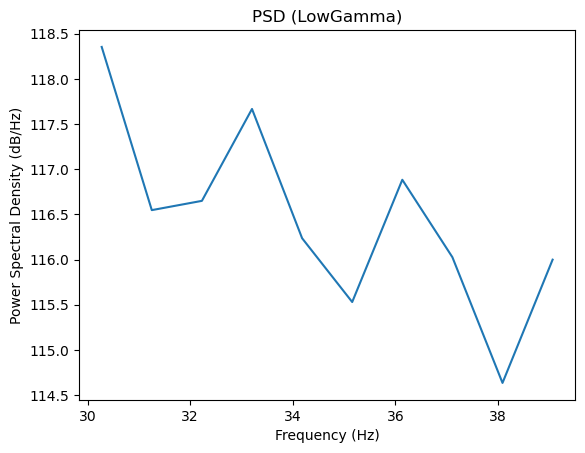

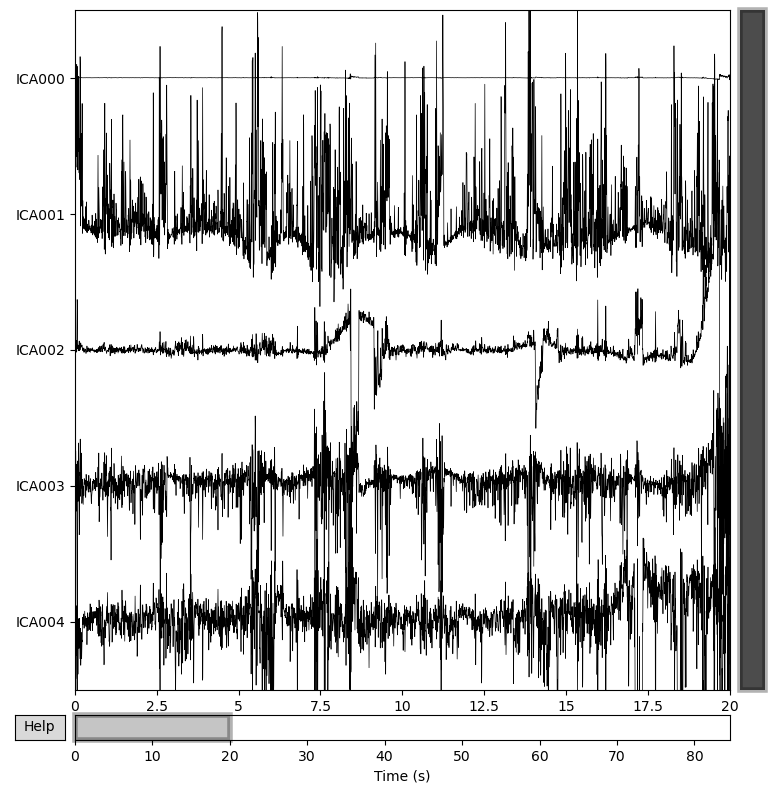

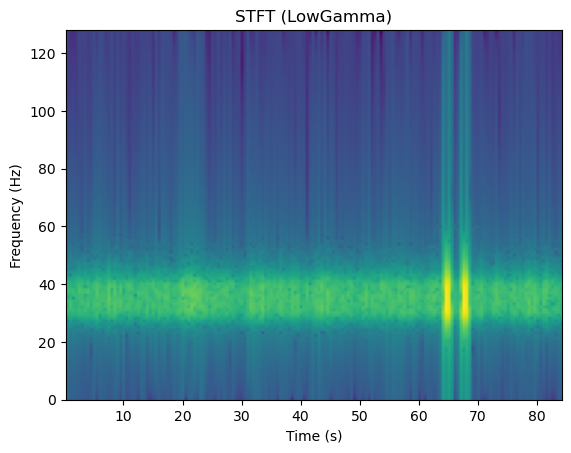

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 40 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 40.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=21649
    Range : 0 ... 21648 =      0.000 ...    84.562 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


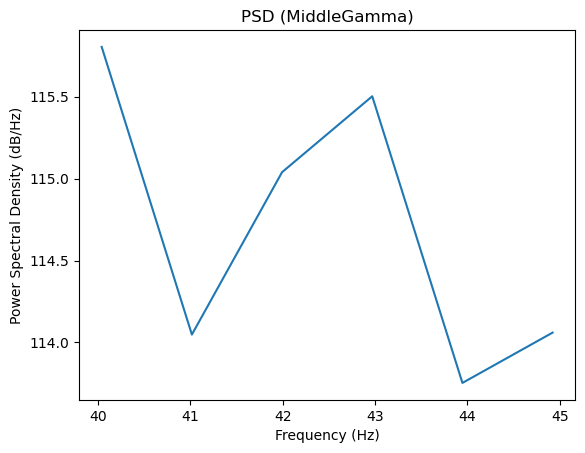

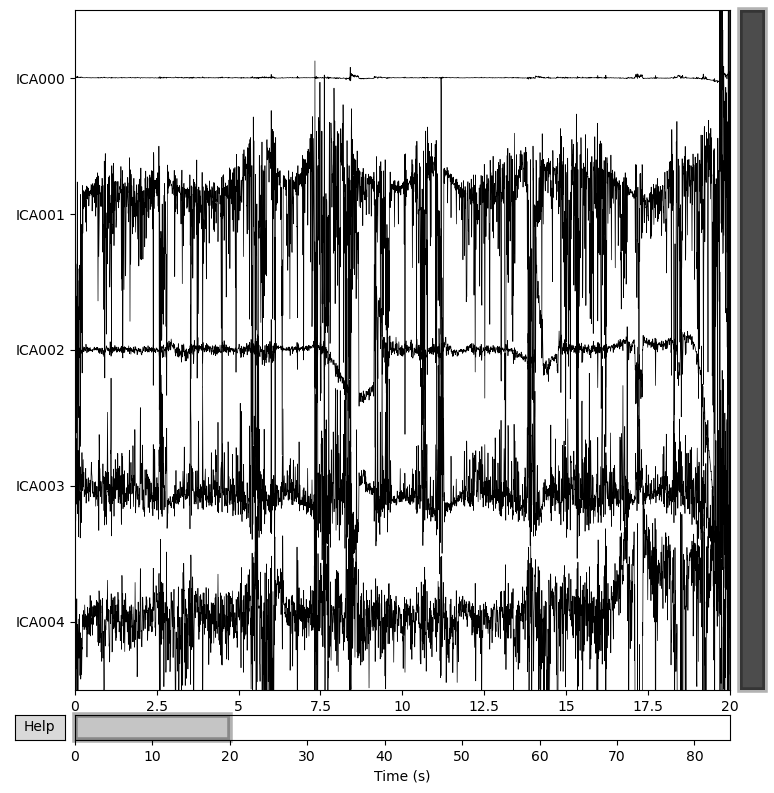

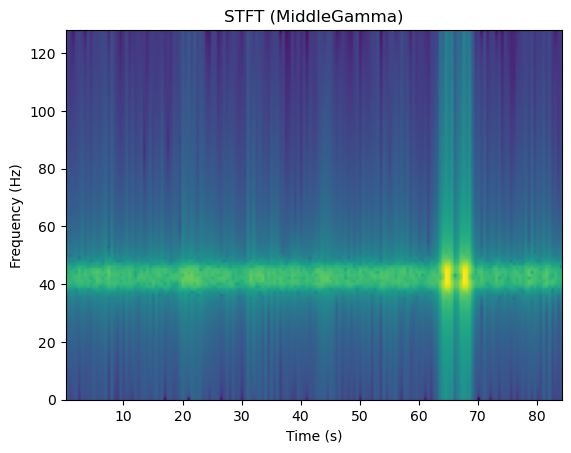

In [8]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame called 'df'

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'LowAlpha': (8, 10),
              'HighAlpha': (10, 12),
              'LowBeta': (12, 16),
              'HighBeta': (16, 30),
              'LowGamma': (30, 40),
              'MiddleGamma': (40, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])
  
    #picks = mne.pick_types(raw.info, eeg=True, meg=False, stim=False, eog=False, misc=True, exclude=[])

    # Now you can use the picks for filtering or any other operation
    
    #raw_band = raw.copy().filter(fmin, fmax, picks=picks, method='iir')

    raw_band = raw.copy().filter(fmin, fmax, method='iir')
    
    #Convert the DataFrame to a numpy array
    data_array = df.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd.mean(axis=0)))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    
    
    # Calculate ICA
    ica = mne.preprocessing.ICA(n_components=5, random_state=42)
    ica.fit(raw_band)
    # Plot ICA
    #ica.plot_components()
    ica.plot_sources(raw, block=False)
    
    
    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    #Show all figures
    plt.show()



Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

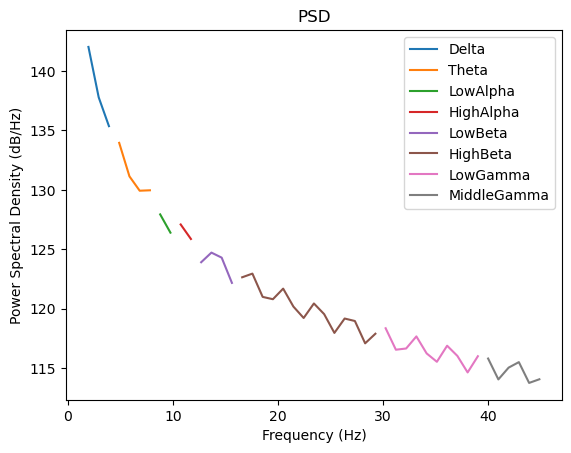

In [9]:
# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(psd.mean(axis=0)), label=band, color=plt.cm.tab10(i))

# Add a legend and labels
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')
    
# Show the figure
plt.show()


Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

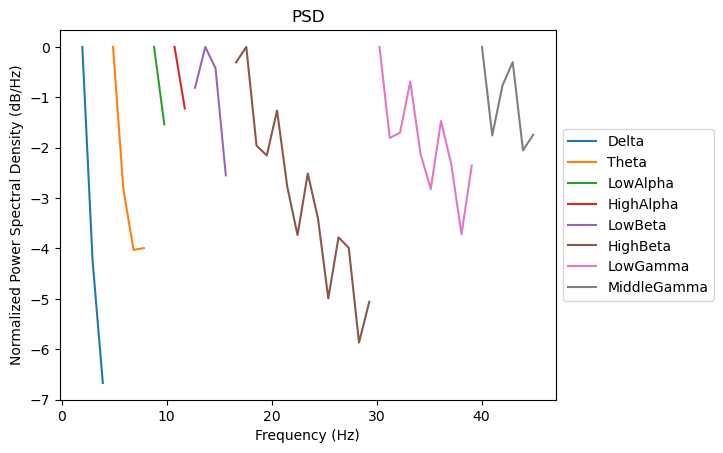

In [10]:
# Initialize the figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the data to the frequency band of interest
    #data_band = df.filter([band])

    # Convert the DataFrame to a numpy array
    data_array = df.T.to_numpy()

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(data_array, sfreq=250, fmin=fmin, fmax=fmax)

    # Normalize PSD by dividing by the sum of all PSD values
    normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd /= np.max(normalized_psd)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(normalized_psd), label=band, color=plt.cm.tab10(i))

# Add a legend and labels outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Show the figure
plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


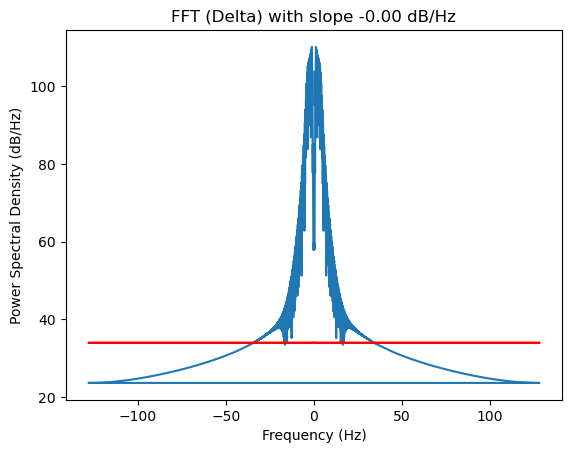

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


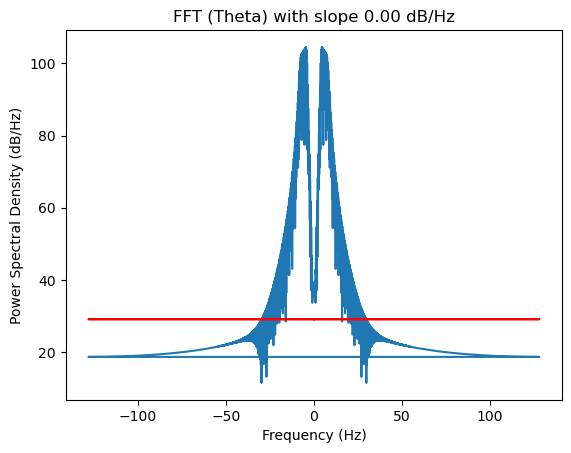

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


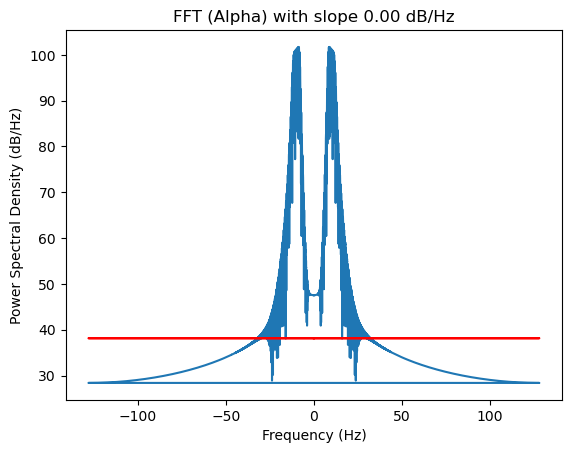

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


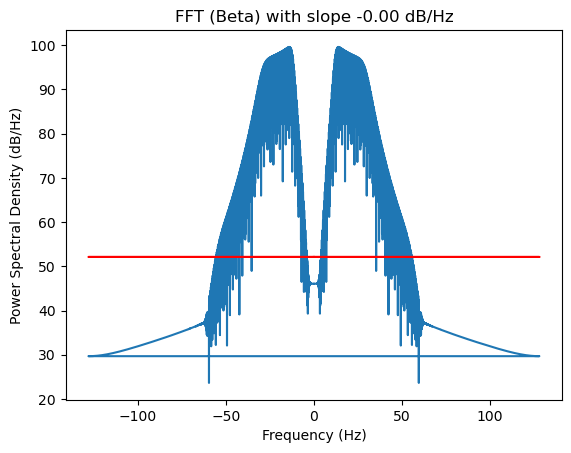

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


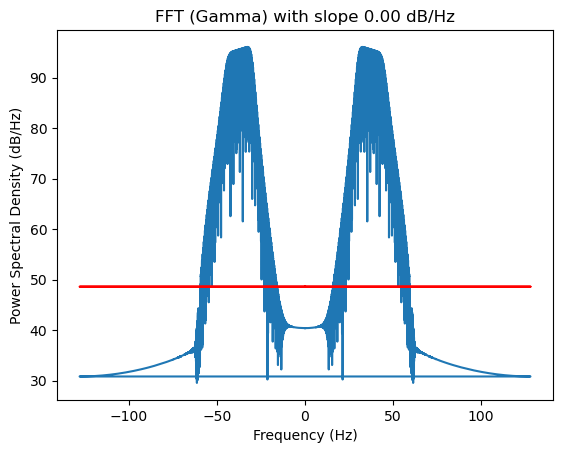

In [11]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time



# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    slope, intercept = np.polyfit(freqs_fft, 10 * np.log10(fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(freqs_fft, 10 * np.log10(fft_abs))
    plt.plot(freqs_fft, slope * freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))


    # Show all figures
    plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


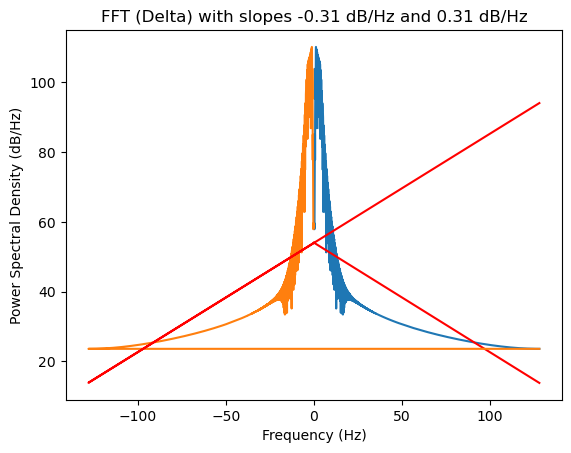

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


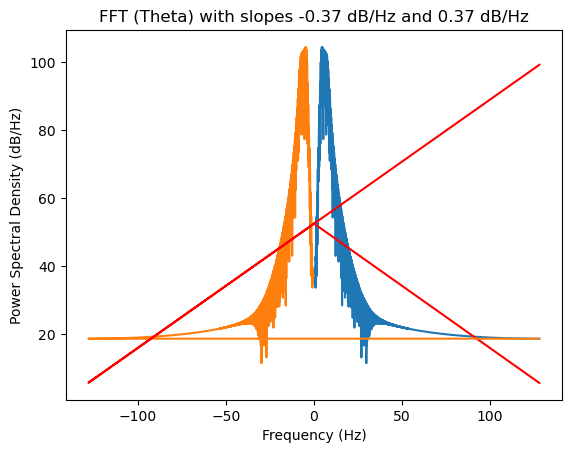

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


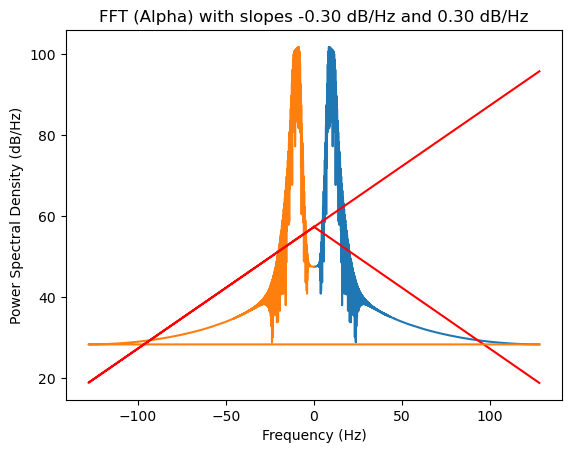

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


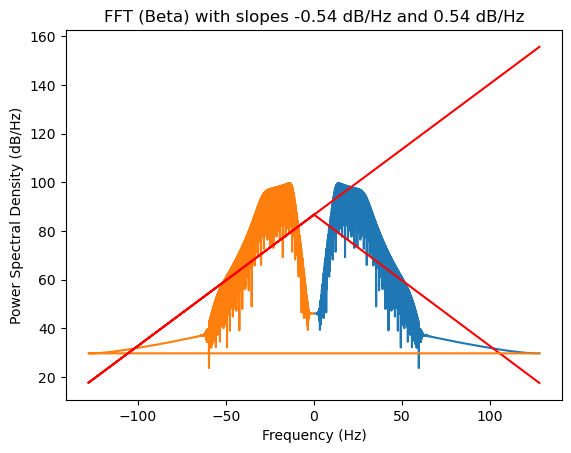

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


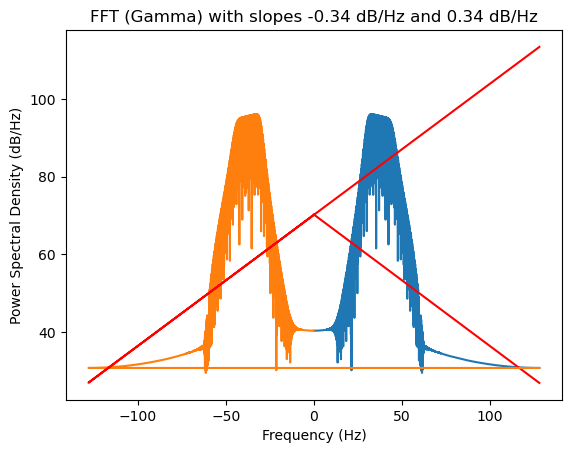

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs1 = fft_abs[:len(fft_abs)//2]
    half_freqs_fft1 = freqs_fft[:len(fft_abs)//2]
    slope1, intercept1 = np.polyfit(half_freqs_fft1, 10 * np.log10(half_fft_abs1), deg=1)

    # Calculate FFT and its slope for the second half
    half_fft_abs2 = fft_abs[len(fft_abs)//2:]
    half_freqs_fft2 = freqs_fft[len(fft_abs)//2:]
    slope2, intercept2 = np.polyfit(half_freqs_fft2, 10 * np.log10(half_fft_abs2), deg=1)

    # Plot FFT with line and slopes for each half
    plt.figure()
    plt.plot(half_freqs_fft1, 10 * np.log10(half_fft_abs1))
    plt.plot(half_freqs_fft1, slope1 * half_freqs_fft1 + intercept1, 'r')
    plt.plot(half_freqs_fft2, 10 * np.log10(half_fft_abs2))
    plt.plot(half_freqs_fft2, slope2 * half_freqs_fft2 + intercept2, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slopes {:.2f} dB/Hz and {:.2f} dB/Hz'.format(band, slope1, slope2))

    # Show all figures
    plt.show()


 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


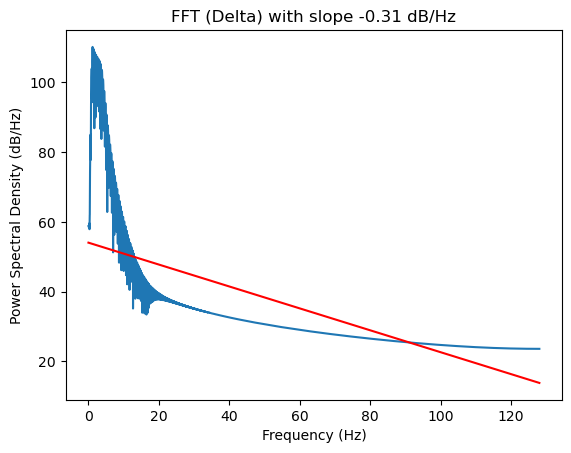

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


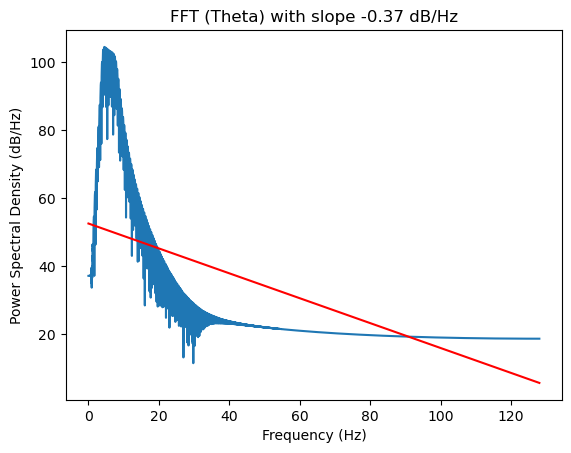

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


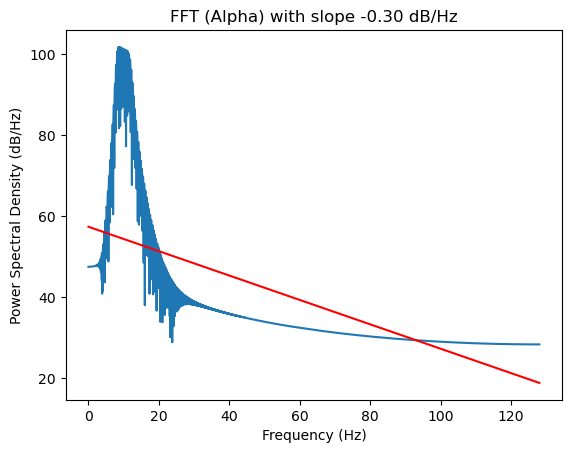

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


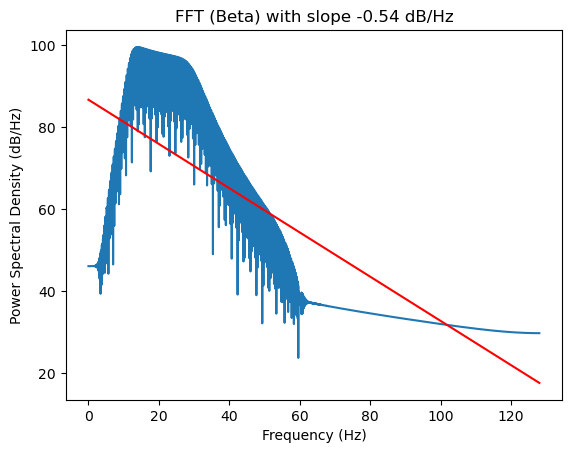

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


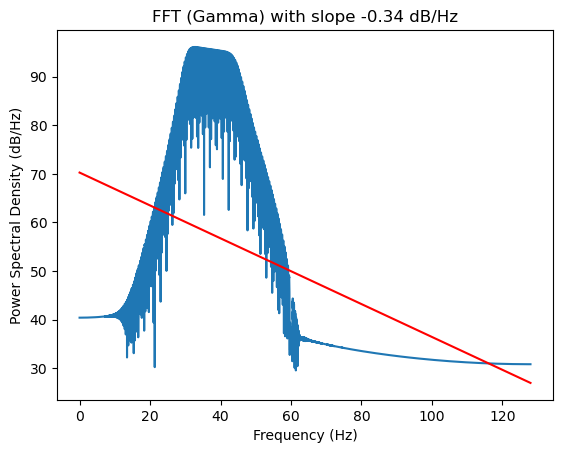

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Calculate FFT and its slope for the first half
    fft = np.fft.fft(raw_band.get_data()[0])
    fft_abs = np.abs(fft)
    freq_step = raw_band.info['sfreq'] / len(fft_abs)
    freqs_fft = np.fft.fftfreq(len(fft_abs)) * raw_band.info['sfreq']
    half_fft_abs = fft_abs[:len(fft_abs)//2]
    half_freqs_fft = freqs_fft[:len(fft_abs)//2]
    slope, intercept = np.polyfit(half_freqs_fft, 10 * np.log10(half_fft_abs), deg=1)

    # Plot FFT with line and slope
    plt.figure()
    plt.plot(half_freqs_fft, 10 * np.log10(half_fft_abs))
    plt.plot(half_freqs_fft, slope * half_freqs_fft + intercept, 'r')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('FFT ({}) with slope {:.2f} dB/Hz'.format(band, slope))

    # Show all figures
    plt.show()
